<a href="https://colab.research.google.com/github/imazerty/1project/blob/master/tp_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/suraggupta/coursera-machine-learning-solutions-python.git

fatal: destination path 'coursera-machine-learning-solutions-python' already exists and is not an empty directory.


In [0]:
import os
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.io import loadmat
import utils
#%load utils.py
%matplotlib inline

Grader = utils.Grader()

In [5]:
#  training data stored in arrays X, y
data = loadmat(os.path.join('coursera-machine-learning-solutions-python','Exercise4','Data','ex4data1.mat'))
X, y = data['X'], data['y'].ravel()
print(X.shape)
print(y.shape)
print(y)
# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

# Number of training examples
m = y.size

(5000, 400)
(5000,)
[10 10 10 ...  9  9  9]


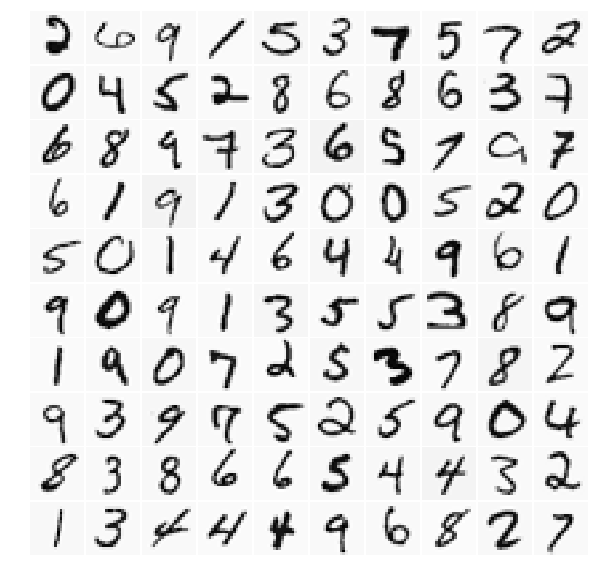

In [23]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

In [0]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

# Load the weights into variables Theta1 and Theta2
weights = loadmat(os.path.join('coursera-machine-learning-solutions-python','Exercise4','Data', 'ex4weights.mat'))

# Theta1 has size 25 x 401
# Theta2 has size 10 x 26
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

# Unroll parameters 
nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

In [0]:
def nnCostFunction(nn_params, input_layer_size,hidden_layer_size,num_labels,  X, y, lambda_):

  """
  %NNCOSTFUNCTION Implements the neural network cost function for a two layer
  %neural network which performs classification
  %   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
  %   X, y, lambda) computes the cost and gradient of the neural network. The
  %   parameters for the neural network are "unrolled" into the vector
  %   nn_params and need to be converted back into the weight matrices. 
  % 
  %   The returned parameter grad should be a "unrolled" vector of the
  %   partial derivatives of the neural network.
  %

  % Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
  % for our 2 layer neural network
  """
  Theta1 = np.reshape(nn_params[0:hidden_layer_size * (input_layer_size + 1)], (hidden_layer_size, input_layer_size + 1))

  Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):], (num_labels, hidden_layer_size + 1))
                   
  """
  % Setup some useful variables
  """
  m = y.size

  """
  % You need to return the following variables correctly 
  """
  J = 0;
  Theta1_grad = np.zeros(Theta1.shape)
  Theta2_grad = np.zeros(Theta2.shape)
  """
  % ====================== YOUR CODE HERE ======================
  % Instructions: You should complete the code by working through the
  %               following parts.
  %
  % Part 1: Feedforward the neural network and return the cost in the
  %         variable J. After implementing Part 1, you can verify that your
  %         cost function computation is correct by verifying the cost
  %         computed in ex4.m
  % the original labels (in the variable y) were 1, 2, ..., 10, for the 
    purpose of training a neural network, we need to recode the labels as 
    vectors containing only values 0 or 1
  """
  a1 = np.concatenate([np.ones((m,1)), X],axis=1)
  a2 = utils.sigmoid(a1.dot(Theta1.T)) 
  a2 = np.concatenate((np.ones((a2.shape[0],1)), a2),axis=1)
  a3 = utils.sigmoid(a2.dot(Theta2.T))  
  #nice trick
  y_matrix = y.reshape(-1)
  y_matrix = np.eye(num_labels)[y_matrix]
  
  
  
  """
  %
  % Part 2: Implement the backpropagation algorithm to compute the gradients
  %         Theta1_grad and Theta2_grad. You should return the partial derivatives of
  %         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
  %         Theta2_grad, respectively. After implementing Part 2, you can check
  %         that your implementation is correct by running checkNNGradients
  %
  %         Note: The vector y passed into the function is a vector of labels
  %               containing values from 1..K. You need to map this vector into a 
  %               binary vector of 1's and 0's to be used with the neural network
  %               cost function.
  %
  %         Hint: We recommend implementing backpropagation using a for-loop
  %               over the training examples if you are implementing it for the 
  %               first time.
  """
  Temp1 = Theta1
  Temp2 = Theta2
  reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(Temp1[:,1:])) + np.sum(np.square(Temp2[:,1:])))
  #print(reg_term)
  J = (-1/m) * np.sum((np.log(a3) * y_matrix) +  np.log(1 - a3) * (1-y_matrix)) + reg_term
  # Backpropogation
  
  
  delta3 = a3 - y_matrix
  #sigmoidGradient(z) == g′(z(l))=a(l).∗ (1−a(l))
  #IMPORTANT:  skip or remove δ(2) 0 
  delta2 =  (delta3 @ Temp2[:,1:]) * sigmoidGradient(a1.dot(Theta1.T)) #shape (m,hidden_layer_size)
  
  Delta1 = delta2.T @ a1
  Delta2 = delta3.T @ a2
  
  # Add regularization to gradient
  Theta1_grad = (1/m) * Delta1
  Theta1_grad[:,1:] = Theta1_grad[:,1:] + (lambda_/m) * Theta1[:,1:]
  Theta2_grad = (1/m) * Delta2
  Theta2_grad[:,1:] = Theta2_grad[:,1:] + (lambda_/m) * Theta2[:,1:]
  """
  % Part 3: Implement regularization with the cost function and gradients.
  %
  %         Hint: You can implement this around the code for
  %               backpropagation. That is, you can compute the gradients for
  %               the regularization separately and then add them to Theta1_grad
  %               and Theta2_grad from Part 2.
  %
  """
  grad = np.concatenate((Theta1_grad.ravel(),Theta2_grad.ravel()))




  """
  % -------------------------------------------------------------

  % =========================================================================

  % Unroll gradients
  """
  return J, grad 



In [19]:
a = np.array([0,1,2,2])
print(type(a))
b = a.reshape(-1)
print(type(b))
print(a.size)
b = np.eye(a.size)[a]
print(b)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
4
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [0]:
def sigmoidGradient(z):
    """
    Computes the gradient of the sigmoid function evaluated at z. 
    This should work regardless if z is a matrix or a vector. 
    In particular, if z is a vector or matrix, you should return
    the gradient for each element.
    
    Parameters
    ----------
    z : array_like
        A vector or matrix as input to the sigmoid function. 
    
    Returns
    --------
    g : array_like
        Gradient of the sigmoid function. Has the same shape as z. 
    
    Instructions
    ------------
    Compute the gradient of the sigmoid function evaluated at
    each value of z (z can be a matrix, vector or scalar).
    
    Note
    ----
    We have provided an implementation of the sigmoid function 
    in `utils.py` file accompanying this assignment.
    """
    
    g = np.zeros(z.shape)
    g = utils.sigmoid(z) * (1 - utils.sigmoid(z))
    
    return g

In [63]:
lambda_ = 0
J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,num_labels, X, y, lambda_)
print('Cost at parameters (loaded from ex4weights): %.6f ' % J)
print('The cost should be about                   : 0.287629.')

0.0
Cost at parameters (loaded from ex4weights): 0.287629 
The cost should be about                   : 0.287629.


In [64]:
grader = utils.Grader()
grader[1] = nnCostFunction
grader.grade()


Submitting Solutions | Programming Exercise neural-network-learning

Login (email address): imen.haddad@supcom.tn
Token: aiwTmxQYB0dR8jvg
0.0
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |   0 /  15 | 
                           Sigmoid Gradient |   0 /   5 | 
  Neural Network Gradient (Backpropagation) |   0 /  40 | 
                       Regularized Gradient |   0 /  10 | 
                                  --------------------------------
                                            |  30 / 100 |  



In [65]:
# Weight regularization parameter (we set this to 1 here).
lambda_ = 1
J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                      num_labels, X, y, lambda_)

print('Cost at parameters (loaded from ex4weights): %.6f' % J)
print('This value should be about                 : 0.383770.')

0.09614069392960475
Cost at parameters (loaded from ex4weights): 0.383770
This value should be about                 : 0.383770.


In [66]:
grader[2] = nnCostFunction
grader.grade()


Submitting Solutions | Programming Exercise neural-network-learning

Use token from last successful submission (imen.haddad@supcom.tn)? (Y/n): Y
0.0
0.5595920974009478
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |  15 /  15 | Nice work!
                           Sigmoid Gradient |   0 /   5 | 
  Neural Network Gradient (Backpropagation) |   0 /  40 | 
                       Regularized Gradient |   0 /  10 | 
                                  --------------------------------
                                            |  45 / 100 |  



In [68]:
z = np.array([-1, -0.5, 0, 0.5, 1])
g = sigmoidGradient(z)
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ')
print(g)

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [69]:
grader[3] = sigmoidGradient
grader.grade()


Submitting Solutions | Programming Exercise neural-network-learning

Use token from last successful submission (imen.haddad@supcom.tn)? (Y/n): Y
0.0
0.5595920974009478
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |  15 /  15 | Nice work!
                           Sigmoid Gradient |   5 /   5 | Nice work!
  Neural Network Gradient (Backpropagation) |   0 /  40 | 
                       Regularized Gradient |   0 /  10 | 
                                  --------------------------------
                                            |  50 / 100 |  



In [0]:

def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    """
    Randomly initialize the weights of a layer in a neural network.
    
    Parameters
    ----------
    L_in : int
        Number of incomming connections.
    
    L_out : int
        Number of outgoing connections. 
    
    epsilon_init : float, optional
        Range of values which the weight can take from a uniform 
        distribution.
    
    Returns
    -------
    W : array_like
        The weight initialiatized to random values.  Note that W should
        be set to a matrix of size(L_out, 1 + L_in) as
        the first column of W handles the "bias" terms.
        
    Instructions
    ------------
    Initialize W randomly so that we break the symmetry while training
    the neural network. Note that the first column of W corresponds 
    to the parameters for the bias unit.
    """

    # You need to return the following variables correctly 
    W = np.zeros((L_out, 1 + L_in))

    # ====================== YOUR CODE HERE ======================

    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

    # ============================================================
    return W


In [71]:
print('Initializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

Initializing Neural Network Parameters ...


In [72]:
utils.checkNNGradients(nnCostFunction)

[[-9.27825235e-03 -9.27825236e-03]
 [-3.04978709e-06 -3.04978914e-06]
 [-1.75060084e-04 -1.75060082e-04]
 [-9.62660640e-05 -9.62660620e-05]
 [ 8.89911959e-03  8.89911960e-03]
 [ 1.42869450e-05  1.42869443e-05]
 [ 2.33146358e-04  2.33146357e-04]
 [ 1.17982666e-04  1.17982666e-04]
 [-8.36010761e-03 -8.36010762e-03]
 [-2.59383093e-05 -2.59383100e-05]
 [-2.87468729e-04 -2.87468729e-04]
 [-1.37149709e-04 -1.37149706e-04]
 [ 7.62813550e-03  7.62813551e-03]
 [ 3.69883257e-05  3.69883234e-05]
 [ 3.35320351e-04  3.35320347e-04]
 [ 1.53247082e-04  1.53247082e-04]
 [-6.74798369e-03 -6.74798370e-03]
 [-4.68759764e-05 -4.68759769e-05]
 [-3.76215583e-04 -3.76215587e-04]
 [-1.66560294e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.64090819e-01  1.64090819e-01]
 [ 1.64567932e-01  1.64567932e-01]
 [ 1.58339334e-01  1.58339334e-01]
 [ 1.51127527e-01  1.51127527e-01]
 [ 1.49568335e-01  1.49568335e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 5.75736494e-02  5.75736493e-02]
 [ 5.77867378e-02  5

In [73]:
grader[4] = nnCostFunction
grader.grade()



Submitting Solutions | Programming Exercise neural-network-learning

Use token from last successful submission (imen.haddad@supcom.tn)? (Y/n): Y
0.0
0.5595920974009478
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |  15 /  15 | Nice work!
                           Sigmoid Gradient |   5 /   5 | Nice work!
  Neural Network Gradient (Backpropagation) |  40 /  40 | Nice work!
                       Regularized Gradient |   0 /  10 | 
                                  --------------------------------
                                            |  90 / 100 |  



In [74]:
#  Check gradients by running checkNNGradients
lambda_ = 3
utils.checkNNGradients(nnCostFunction, lambda_)

# Also output the costFunction debugging values
debug_J, _  = nnCostFunction(nn_params, input_layer_size,
                          hidden_layer_size, num_labels, X, y, lambda_)

print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' % (lambda_, debug_J))
print('(for lambda = 3, this value should be about 0.576051)')

[[-9.27825235e-03 -9.27825236e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [ 8.89911959e-03  8.89911960e-03]
 [ 3.94334829e-02  3.94334829e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-8.36010761e-03 -8.36010762e-03]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 7.62813550e-03  7.62813551e-03]
 [ 2.47640974e-02  2.47640974e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-3.26881426e-02 -3.26881426e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [ 5.46101547e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.18682669e-01  1.18682669e-01]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1.25698067e-01  1.25698067e-01]
 [ 1.76337550e-01  1.76337550e-01]
 [ 1.32294136e-01  1.32294136e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 3.81928689e-05  3.81928696e-05]
 [ 1.17148233e-01  1

In [75]:
grader[5] = nnCostFunction
grader.grade()


Submitting Solutions | Programming Exercise neural-network-learning

Use token from last successful submission (imen.haddad@supcom.tn)? (Y/n): Y
0.0
0.5595920974009478
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |  15 /  15 | Nice work!
                           Sigmoid Gradient |   5 /   5 | Nice work!
  Neural Network Gradient (Backpropagation) |  40 /  40 | Nice work!
                       Regularized Gradient |  10 /  10 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



In [0]:
#change the maxiter to a larger
#  value to see how more training helps.
options= {'maxiter':100}

#  You should also try different values of lambda
lambda_ = 1

costFunction = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size,num_labels, X, y, lambda_)
res = optimize.minimize(costFunction, initial_nn_params, jac=True, method = 'TNC', options = options)
# get the solution of the optimization
nn_params = res.x
# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[: hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))
Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):],
                    (num_labels, (hidden_layer_size + 1)))

In [78]:
pred = utils.predict(Theta1, Theta2, X)
print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

Training Set Accuracy: 97.020000


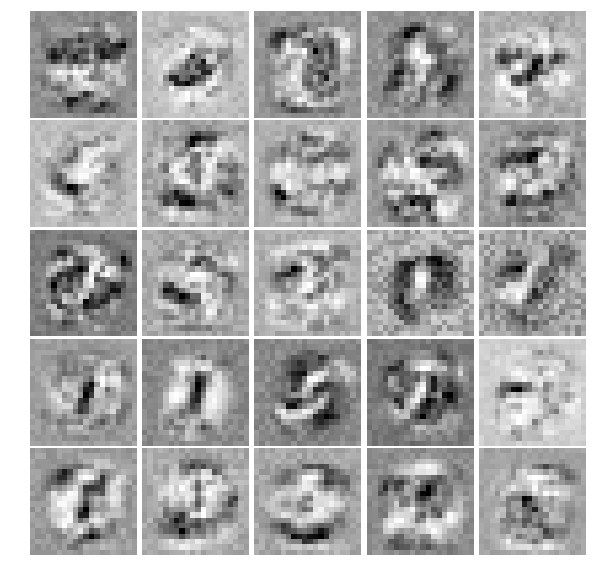

In [79]:
utils.displayData(Theta1[:, 1:])